In [ ]:
import numpy as np
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
df=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


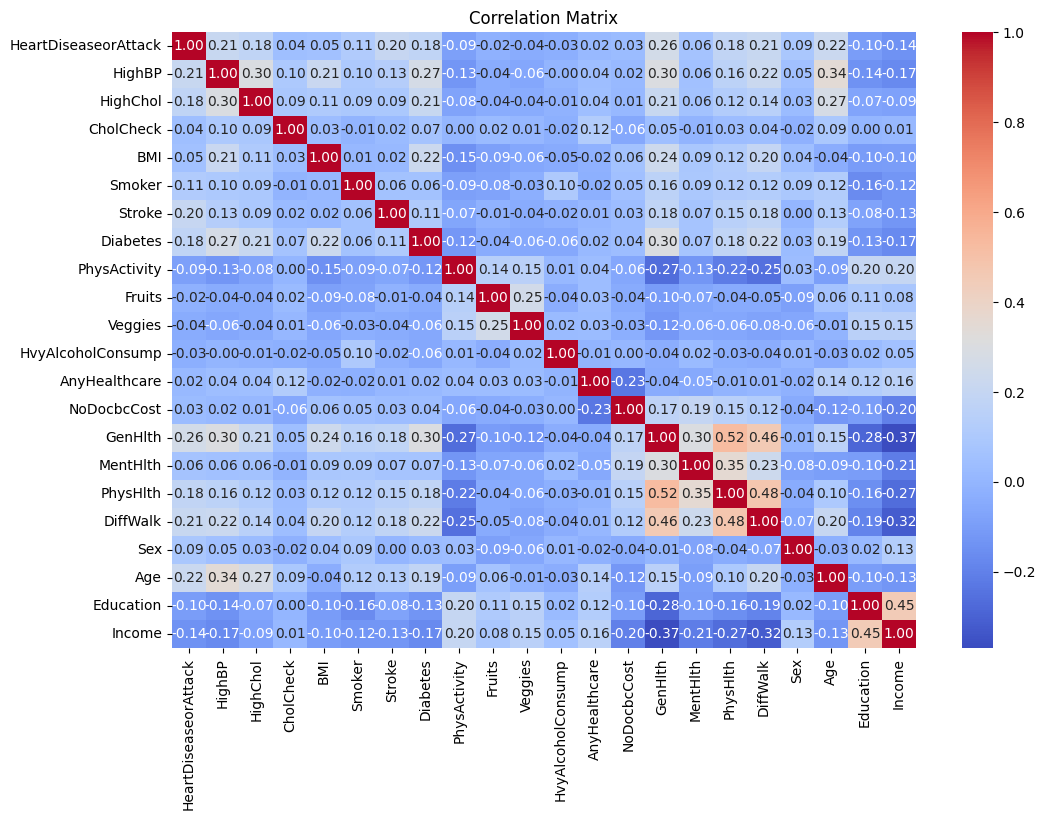

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming your target variable is 'HeartDiseaseorAttack'
X = df.drop(columns=['HeartDiseaseorAttack'])
y = df['HeartDiseaseorAttack']

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the feature importances
print(feature_importances)


                   importance
BMI                  0.195397
Age                  0.109899
Income               0.102910
PhysHlth             0.085690
Education            0.072780
GenHlth              0.068389
MentHlth             0.064669
Fruits               0.032774
PhysActivity         0.028871
Diabetes             0.028310
Stroke               0.027576
Veggies              0.027149
HighBP               0.027118
DiffWalk             0.024998
HighChol             0.023547
Sex                  0.023351
Smoker               0.020876
NoDocbcCost          0.014812
HvyAlcoholConsump    0.009376
AnyHealthcare        0.007603
CholCheck            0.003904


In [ ]:
features_to_remove = [
    'PhysActivity', 'Diabetes', 'Stroke', 'Veggies', 'HighBP',
    'DiffWalk', 'HighChol', 'Sex', 'Smoker', 'NoDocbcCost',
    'HvyAlcoholConsump', 'AnyHealthcare', 'CholCheck'
]

# Drop the selected features from the dataset
X = X.drop(columns=features_to_remove)

In [ ]:
X

,BMI,Fruits,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,40.0,0.0,5.0,18.0,15.0,9.0,4.0,3.0
1,25.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0
2,28.0,1.0,5.0,30.0,30.0,9.0,4.0,8.0
3,27.0,1.0,2.0,0.0,0.0,11.0,3.0,6.0
4,24.0,1.0,2.0,3.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...
253675,45.0,1.0,3.0,0.0,5.0,5.0,6.0,7.0
253676,18.0,0.0,4.0,0.0,0.0,11.0,2.0,4.0
253677,28.0,1.0,1.0,0.0,0.0,2.0,5.0,2.0
253678,23.0,1.0,3.0,0.0,0.0,7.0,5.0,1.0


In [ ]:
value_counts = df['HeartDiseaseorAttack'].value_counts()

In [ ]:
value_counts

,count
HeartDiseaseorAttack,
0.0,229787
1.0,23893


In [ ]:
X

,BMI,Fruits,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,40.0,0.0,5.0,18.0,15.0,9.0,4.0,3.0
1,25.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0
2,28.0,1.0,5.0,30.0,30.0,9.0,4.0,8.0
3,27.0,1.0,2.0,0.0,0.0,11.0,3.0,6.0
4,24.0,1.0,2.0,3.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...
253675,45.0,1.0,3.0,0.0,5.0,5.0,6.0,7.0
253676,18.0,0.0,4.0,0.0,0.0,11.0,2.0,4.0
253677,28.0,1.0,1.0,0.0,0.0,2.0,5.0,2.0
253678,23.0,1.0,3.0,0.0,0.0,7.0,5.0,1.0


In [ ]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.15),
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.15),
    Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0003), loss='binary_crossentropy',
               metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(X_train, y_train, epochs=35, batch_size=64,
           validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/35
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.7243 - loss: 0.7569 - precision: 0.7101 - recall: 0.7539 - val_accuracy: 0.7562 - val_loss: 0.5078 - val_precision: 0.7436 - val_recall: 0.7819 - learning_rate: 3.0000e-04
Epoch 2/35
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.7511 - loss: 0.5117 - precision: 0.7283 - recall: 0.8030 - val_accuracy: 0.7638 - val_loss: 0.4898 - val_precision: 0.7426 - val_recall: 0.8076 - learning_rate: 3.0000e-04
Epoch 3/35
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7561 - loss: 0.5000 - precision: 0.7351 - recall: 0.8028 - val_accuracy: 0.7666 - val_loss: 0.4828 - val_precision: 0.7473 - val_recall: 0.8058 - learning_rate: 3.0000e-04
Epoch 4/35
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7568 - loss: 0.4941 - precision: 0.7350 - recall: 0.8039 - val_accuracy: 0.7664 - val_loss: 0.4785 - val_precision: 0.7392 - val_recall: 0.8231 - learning_rate: 3.0000e-04
Epoch 5/35
5745/5745 ━━━━━━━━━━━━━━━

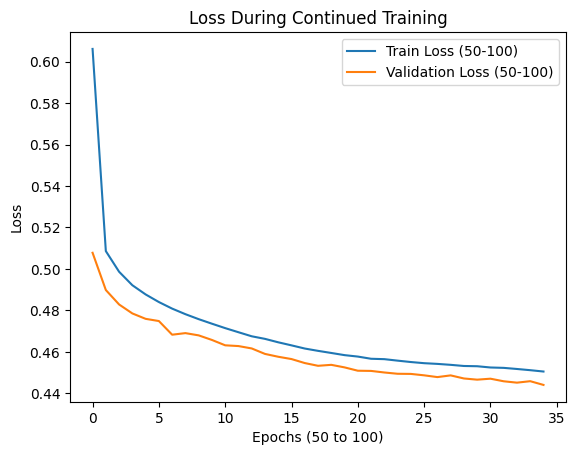

In [ ]:
plt.plot(history.history['loss'], label='Train Loss (50-100)')
plt.plot(history.history['val_loss'], label='Validation Loss (50-100)')
plt.title('Loss During Continued Training')
plt.xlabel('Epochs (50 to 100)')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('heart_disease_mode1l.h5')